<a href="https://colab.research.google.com/github/Regis-Caelum/Machine-Learning/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.7MB 5.2MB/s 
  Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [2]:
from __future__ import absolute_import, division , print_function, unicode_literals

In [3]:
try:
    %tensorflow_version 2.x

except Exception:
    pass

import tensorflow as tf

In [4]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

#helper libraries
import matplotlib.pyplot as plt
import numpy as np
import math

In [5]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [6]:
dataset , metadata = tfds.load('fashion_mnist' , as_supervised=True , with_info=True)

train_dataset, test_dataset = dataset['train'] , dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [8]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print('Number of training examples:{}'.format(num_train_examples))
print('Number of testing examples:{}'.format(num_test_examples))

Number of training examples:60000
Number of testing examples:10000


In [9]:
def normalize(images,labels):

    # Casts a tensor to a new type.
    # The operation casts x (in case of Tensor) or x.values (in case of SparseTensor) to dtype.
    images = tf.cast(images , tf.float32)
    
    images /= 255
    return images , labels

#The map function applies the normalize() function to each element in the 
# train and test datasets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

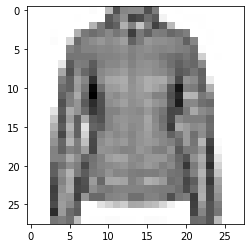

In [10]:
for image,labels in test_dataset.take(1):
    break

image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar
plt.grid(False)
plt.show()

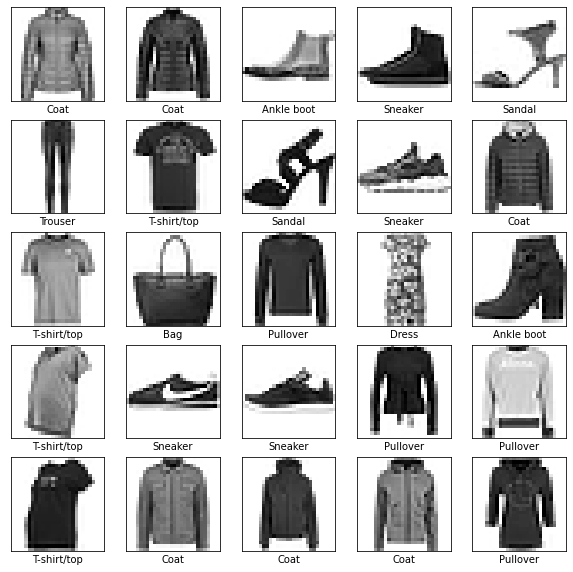

In [11]:
plt.figure(figsize=(10,10))

i = 0

for image,labels in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, plt.cm.binary)
    plt.xlabel(class_names[labels])
    i += 1

plt.show()

In [12]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                             ])

In [13]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [15]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 8s 2ms/step - loss: 0.6319 - accuracy: 0.7817
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3777 - accuracy: 0.8636
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3322 - accuracy: 0.8788
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3166 - accuracy: 0.8832
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2850 - accuracy: 0.8940


In [16]:
test_loss,test_accuracy = model.evaluate(test_dataset , steps = math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.3451 - accuracy: 0.8769
Accuracy on test dataset: 0.8769000172615051


In [17]:
for test_images,test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)\

In [18]:
print('Our Model Predicted:', np.argmax(predictions[0]))
print('Actual Result:',test_labels[0])

Our Model Predicted: 4
Actual Result: 4


In [19]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img[...,0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

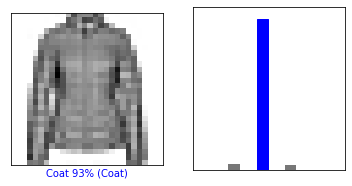

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

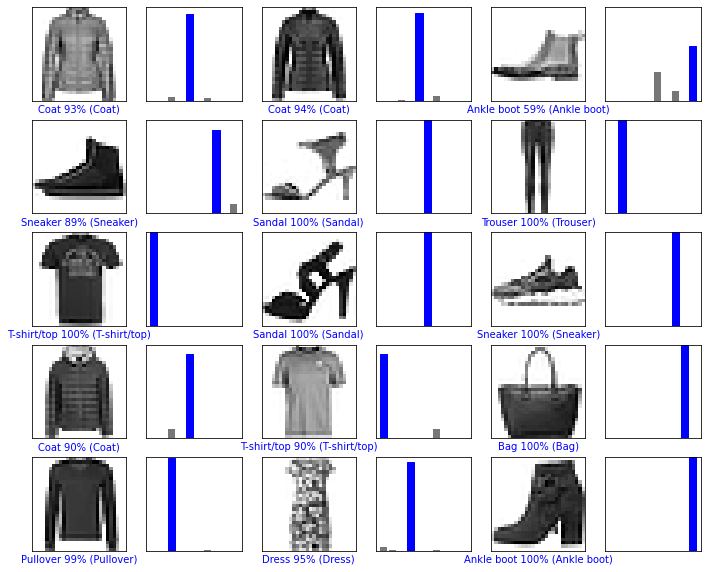

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)